In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sys
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

In [11]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 3].values

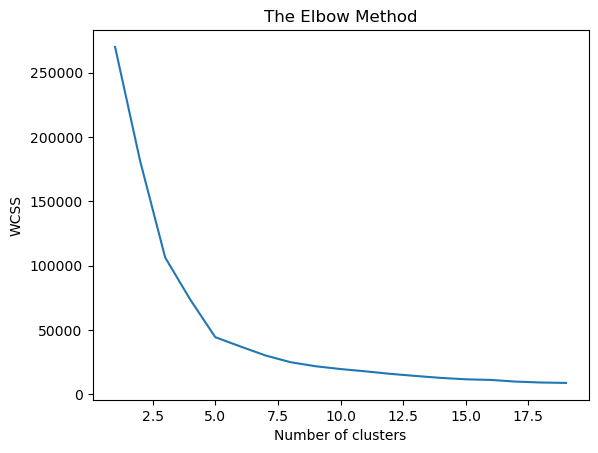

In [12]:
# Using the Elbow method to find the optimal number of clusters
WCSS = []
# Within-Cluster Sum of Squares
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    # kmeans.inertia_ := Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided
plt.plot(range(1, 20), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [14]:
# The Silhouette Score is calculated using the mean intra-cluster distance (i) and
# the mean nearest-cluster distance (n) for each sample. The Silhouette Coefficient for a sample is (n - i) / max(i, n).
# Intra-cluster distance is the distance between a data item and the cluster centroid within a cluster.

print ("Silhoutte score", silhouette_score(X, y_kmeans, metric = 'euclidean'))
# The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
# The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that
# the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

print ("RAND score", rand_score(y, y_kmeans))

Silhoutte score 0.553931997444648
RAND score 0.7506532663316583


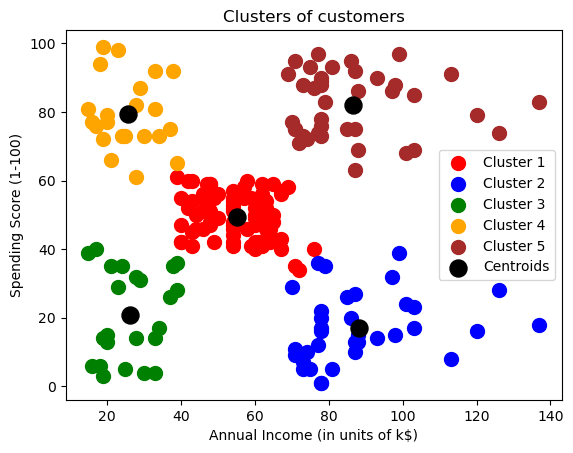

In [15]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'brown', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'Black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (in units of k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()